Goal: Get Ultimate Tensile Strength (UTS) of a material from its chemical composition + heat treatment + hardness.

In [346]:
import pandas as pd

df = pd.read_csv('welddb_data.csv')

In [347]:
# Rename and remove unnecessary columns
df.columns = [f"{col.split()[0]} concentration" if 'concentration' in col else col for col in df.columns]

# Remove those columns
for col in ['Charpy temperature', 'Charpy impact toughness / J', 'Primary ferrite in microstructure / %', 'Ferrite with second phase / %', 'Acicular ferrite / %', 'Martensite / %', 'Ferrite with carbide aggregate / %', '50% FATT', 'Reduction of Area / %', 'Ultimate tensile strength / MPa']:
    df.drop(col, axis=1, inplace=True)

In [348]:
df.head()

,Carbon concentration,Silicon concentration,Manganese concentration,Sulphur concentration,Phosphorus concentration,Nickel concentration,Chromium concentration,Molybdenum concentration,Vanadium concentration,Copper concentration,...,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature,Type of weld,Post weld heat treatment temperature,Post weld heat treatment time / hours,Yield strength / MPa,Elongation / %,Hardness / kg mm^{-2},Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,+,1.0,200,MMA,250.0,14.0,392.0,31.9,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,+,1.0,200,MMA,0.0,0.0,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,+,1.0,200,MMA,580.0,2.0,370.0,35.2,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,+,1.0,200,MMA,250.0,14.0,413.0,31.2,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,+,1.0,200,MMA,0.0,0.0,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Bawch


In [349]:
# Extract the df where Yield strength / % and Hardness / kg mm^{-2} is not NaN
df_hardness = df[~df['Yield strength / MPa'].isna() & ~df['Hardness / kg mm^{-2}'].isna()]

print("Size of df_hardness: ", df_hardness.shape)

df_hardness.loc[:, 'Hardness / kg mm^{-2}'] = df_hardness['Hardness / kg mm^{-2}'].apply(lambda x: x.split('Hv')[0] if 'Hv' in x else x).astype(float, errors='ignore')
df_hardness.loc[:, 'Hardness / kg mm^{-2}'] = df_hardness['Hardness / kg mm^{-2}'].apply(lambda x: x.split('(')[0] if '(' in x else x)


Size of df_hardness:  (87, 34)


In [350]:
# Drop columns (not rows) with any NaN values
df_hardness = df_hardness.dropna(axis=1)

df_hardness.head()

,Carbon concentration,Silicon concentration,Manganese concentration,Sulphur concentration,Phosphorus concentration,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature,Type of weld,Post weld heat treatment temperature,Post weld heat treatment time / hours,Yield strength / MPa,Hardness / kg mm^{-2},Weld ID
879,0.05,0.29,0.72,0.007,0.009,DC,+,2.0,200,SA,0.0,0.0,649.0,257,Hunt&-Di-1994-1
880,0.05,0.27,0.75,0.006,0.010,DC,+,3.3,200,SA,0.0,0.0,576.0,227,Hunt&-Di-1994-2
881,0.05,0.26,0.75,0.006,0.010,DC,+,4.6,200,SA,0.0,0.0,556.0,224,Hunt&-Di-1994-3
882,0.05,0.27,0.77,0.005,0.010,DC,+,5.3,200,SA,0.0,0.0,538.0,226,Hunt&-Di-1994-4
883,0.05,0.26,0.98,0.005,0.012,DC,+,2.0,200,SA,0.0,0.0,571.0,234,Hunt&-Di-1994-5


In [351]:
# One-hot encoding the Type of weld column
df_hardness = pd.get_dummies(df_hardness, columns=['Type of weld'])

# Encoding the AC or DC column
df_hardness['AC or DC'] = df_hardness['AC or DC'].apply(lambda x: 1 if x == 'AC' else 0)
df_hardness['AC or DC'] = df_hardness['AC or DC'].astype(bool)

# Endoding the Electrode positive or negative column
df_hardness['Electrode positive or negative'] = df_hardness['Electrode positive or negative'].apply(lambda x: 1 if x == '+' else 0)
df_hardness['Electrode positive or negative'] = df_hardness['Electrode positive or negative'].astype(bool)

# Replace '<' and '>' with empty string and convert to float
df_hardness['Sulphur concentration'] = df_hardness['Sulphur concentration'].str.replace('<', '').str.replace('>', '').astype(float)

# Replace '150-200' with 175
df_hardness["Interpass temperature"] = df_hardness["Interpass temperature"].str.replace('150-200', '175').astype(int)

# Change the type of the Hardness / kg mm^{-2} column to int
df_hardness["Hardness / kg mm^{-2}"] = df_hardness["Hardness / kg mm^{-2}"].astype(int)

# Remove Weld ID column 
df_hardness.drop('Weld ID', axis=1, inplace=True)

In [352]:
# Split the data into X and y
X = df_hardness.drop('Yield strength / MPa', axis=1)
y = df_hardness['Yield strength / MPa']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize scalers
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Scale features
X_train[numerical_cols] = feature_scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = feature_scaler.transform(X_test[numerical_cols])

# Scale target variable
y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = target_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

Model:  Linear Regression  R2 score:  0.7428445007750633
Model:  Random Forest  R2 score:  0.31250603952775236
Model:  SVR  R2 score:  0.8180480471873209
Model:  Decision Tree  R2 score:  -0.22996521007291437
Model:  Gradient Boosting  R2 score:  0.017596669424748357
Model:  AdaBoost  R2 score:  0.1859888693442645
Model:  Bagging  R2 score:  0.44154874020569657
Model:  Extra Trees  R2 score:  0.2800972262760064

Best model:  SVR()
Best score:  0.8180480471873209
RMSE 0.0659958110297249


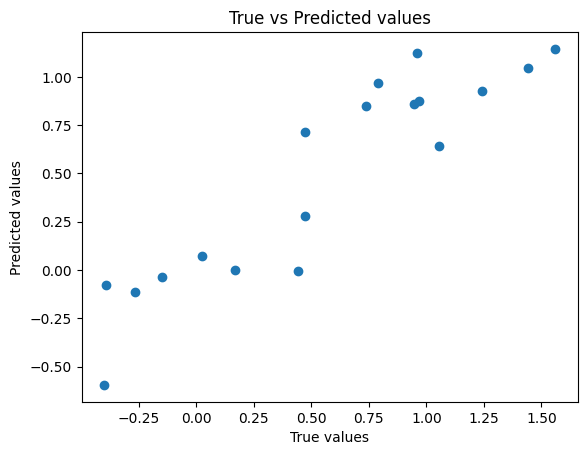

In [353]:
# Try with lots of regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}

# Get best model (from r2 score)
from sklearn.metrics import r2_score

best_model = None
best_score = -1
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print("Model: ", name, " R2 score: ", score)
    if score > best_score:
        best_score = score
        best_model = model

print()
print("Best model: ", best_model)
print("Best score: ", best_score)
print("RMSE", mean_squared_error(y_test, best_model.predict(X_test)))

# Display the characteristics of the best model
import matplotlib.pyplot as plt

plt.scatter(y_test, best_model.predict(X_test))
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted values")

plt.show()

In [354]:
# Predict the missing Yield strength values from the base dataset with the SVR model

# Extract the df where Yield strength / % is NaN and Hardness / kg mm^{-2} is not NaN
df_missing = df[df['Yield strength / MPa'].isna() & ~df['Hardness / kg mm^{-2}'].isna()]
print("Shape of df_missing: ", df_missing.shape)

# Drop the columns that are not in the training data
for col in df_missing.columns:
    if col not in X.columns and col != 'Type of weld':
        df_missing = df_missing.drop(col, axis=1)

# Missing values
missing_values = df_missing.isna().sum()
print("Missing values:\n", missing_values)

# No missing values !

Shape of df_missing:  (51, 34)
Missing values:
 Carbon concentration                     0
Silicon concentration                    0
Manganese concentration                  0
Sulphur concentration                    0
Phosphorus concentration                 0
AC or DC                                 0
Electrode positive or negative           0
Heat input / kJ mm^{-1}                  0
Interpass temperature                    0
Type of weld                             0
Post weld heat treatment temperature     0
Post weld heat treatment time / hours    0
Hardness / kg mm^{-2}                    0
dtype: int64


In [355]:
   # Redo all the encoding and scaling
# One-hot encoding the Type of weld column
df_missing = pd.get_dummies(df_missing, columns=['Type of weld'])

# Add the missing columns
for col in X.columns:
      if col not in df_missing.columns:
         df_missing[col] = 0
         df_missing[col] = df_missing[col].astype(bool)

# Correct type of the Hardness / kg mm^{-2} column
df_missing.loc[:, 'Hardness / kg mm^{-2}'] = df_missing['Hardness / kg mm^{-2}'].apply(lambda x: x.split('Hv')[0] if isinstance(x, str) and 'Hv' in x else x).astype(float, errors='ignore')
df_missing.loc[:, 'Hardness / kg mm^{-2}'] = df_missing['Hardness / kg mm^{-2}'].apply(lambda x: x.split('(')[0] if isinstance(x, str) and '(' in x else x)


# Encoding the AC or DC column
df_missing['AC or DC'] = df_missing['AC or DC'].apply(lambda x: 1 if x == 'AC' else 0)
df_missing['AC or DC'] = df_missing['AC or DC'].astype(bool)

# Endoding the Electrode positive or negative column
df_missing['Electrode positive or negative'] = df_missing['Electrode positive or negative'].apply(lambda x: 1 if x == '+' else 0)
df_missing['Electrode positive or negative'] = df_missing['Electrode positive or negative'].astype(bool)

# Replace '<' and '>' with empty string and convert to float
df_missing['Sulphur concentration'] = df_missing['Sulphur concentration'].str.replace('<', '').str.replace('>', '').astype(float)

# Replace '150-200' with 175
df_missing["Interpass temperature"] = df_missing["Interpass temperature"].str.replace('150-200', '175').astype(int)

# Change the type of the Hardness / kg mm^{-2} column to int
df_missing["Hardness / kg mm^{-2}"] = df_missing["Hardness / kg mm^{-2}"].astype(int)

df_missing.head()

,Carbon concentration,Silicon concentration,Manganese concentration,Sulphur concentration,Phosphorus concentration,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature,Post weld heat treatment temperature,Post weld heat treatment time / hours,Hardness / kg mm^{-2},Type of weld_MMA,Type of weld_SA,Type of weld_TSA
1166,0.08,0.45,0.96,0.007,0.015,False,True,1.3,175,0.0,0.0,459,True,False,False
1167,0.10,0.54,0.66,0.006,0.014,False,True,1.0,175,0.0,0.0,405,True,False,False
1168,0.09,0.46,0.99,0.012,0.021,False,True,1.4,175,0.0,0.0,451,True,False,False
1169,0.09,0.37,1.03,0.004,0.010,False,True,1.3,175,0.0,0.0,432,True,False,False
1170,0.09,0.37,1.03,0.004,0.010,False,True,1.3,175,720.0,2.0,264,True,False,False


In [356]:
# Scale numerical features
df_missing[numerical_cols] = feature_scaler.transform(df_missing[numerical_cols])

# Predict missing Yield strength
pred_scaled = best_model.predict(df_missing)
pred = target_scaler.inverse_transform(pred_scaled.reshape(-1, 1)).ravel()

# Add the predicted values to the base dataset as int
df_missing['Yield strength / MPa'] = pred.astype(int)

# Add the Weld ID column
df_missing['Weld ID'] = df.loc[df['Yield strength / MPa'].isna() & ~df['Hardness / kg mm^{-2}'].isna(), 'Weld ID']

# Unscale features
df_missing[numerical_cols] = feature_scaler.inverse_transform(df_missing[numerical_cols])

df_missing.head()

,Carbon concentration,Silicon concentration,Manganese concentration,Sulphur concentration,Phosphorus concentration,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature,Post weld heat treatment temperature,Post weld heat treatment time / hours,Hardness / kg mm^{-2},Type of weld_MMA,Type of weld_SA,Type of weld_TSA,Yield strength / MPa,Weld ID
1166,0.08,0.45,0.96,0.007,0.015,False,True,1.3,175.0,0.0,1.110223e-16,459.0,True,False,False,509,PantK-1990-w1
1167,0.10,0.54,0.66,0.006,0.014,False,True,1.0,175.0,0.0,1.110223e-16,405.0,True,False,False,518,PantK-1990-w2
1168,0.09,0.46,0.99,0.012,0.021,False,True,1.4,175.0,0.0,1.110223e-16,451.0,True,False,False,511,PantK-1990-w3
1169,0.09,0.37,1.03,0.004,0.010,False,True,1.3,175.0,0.0,1.110223e-16,432.0,True,False,False,514,PantK-1990-w4.0
1170,0.09,0.37,1.03,0.004,0.010,False,True,1.3,175.0,720.0,2.000000e+00,264.0,True,False,False,562,PantK-1990-w4.1


In [358]:
# Create a CSV with Weld ID and predicted Yield strength
df_missing[['Weld ID', 'Yield strength / MPa']].to_csv('hardness_yield.csv', index=False)

In [ ]:
# Set pandas max columns to 100
